In [2]:
import pandas as pd

# 쇼핑몰정제.csv 파일을 data로 로드
data = pd.read_csv('/Users/pjh_air/Documents/GitHub/sg_2cha/jh/0108_정제/쇼핑몰이탈정제.csv', encoding='utf-8-sig')



In [3]:
from pycaret.classification import setup, compare_models

# PyCaret 환경 설정
clf = setup(data=data, target='이탈 여부', session_id=42)


,Description,Value
0,Session id,42
1,Target,이탈 여부
2,Target type,Binary
3,Original data shape,"(5379, 20)"
4,Transformed data shape,"(5379, 35)"
5,Transformed train set shape,"(3765, 35)"
6,Transformed test set shape,"(1614, 35)"
7,Numeric features,14
8,Categorical features,5
9,Preprocess,True


In [4]:
# 모든 모델 비교
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9583,0.9792,0.8049,0.9265,0.8609,0.8365,0.8397,0.2770
et,Extra Trees Classifier,0.9511,0.9825,0.7172,0.9713,0.8241,0.7966,0.8095,0.0670
rf,Random Forest Classifier,0.9487,0.9821,0.7174,0.9521,0.8177,0.7886,0.7997,0.0780
dt,Decision Tree Classifier,0.9264,0.8694,0.7852,0.7674,0.7750,0.7311,0.7320,0.0220
gbc,Gradient Boosting Classifier,0.9198,0.9385,0.6396,0.8235,0.7184,0.6726,0.6809,0.1530
ada,Ada Boost Classifier,0.8954,0.9094,0.5751,0.7181,0.6377,0.5775,0.5829,0.0510
lda,Linear Discriminant Analysis,0.8938,0.8841,0.4990,0.7601,0.6008,0.5427,0.5596,0.0210
lr,Logistic Regression,0.8919,0.8857,0.4876,0.7557,0.5905,0.5318,0.5499,0.4000
ridge,Ridge Classifier,0.8786,0.8840,0.2709,0.9059,0.4161,0.3702,0.4555,0.0170
dummy,Dummy Classifier,0.8393,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0210


In [5]:
from pycaret.classification import tune_model

# LightGBM 모델 튜닝
tuned_model = tune_model(best_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9337,0.9618,0.7541,0.8214,0.7863,0.7472,0.7481
1,0.9602,0.9767,0.8197,0.9259,0.8696,0.8462,0.8484
2,0.9072,0.9368,0.6557,0.7407,0.6957,0.6411,0.6428
3,0.9337,0.9631,0.7541,0.8214,0.7863,0.7472,0.7481
4,0.9231,0.9525,0.7049,0.7963,0.7478,0.7026,0.7045
5,0.9415,0.9787,0.7667,0.8519,0.8070,0.7726,0.7741
6,0.9362,0.9704,0.7000,0.8750,0.7778,0.7410,0.7473
7,0.9176,0.9524,0.6833,0.7736,0.7257,0.6774,0.6792
8,0.9521,0.9416,0.7667,0.9200,0.8364,0.8086,0.8132


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [6]:
print(best_model)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [7]:
from pycaret.classification import save_model

save_model(best_model, 'lightgbm_original_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['고객 ID', '가입 기간', '도시 등급', '배송거리',
                                              '앱 사용 시간', '기기 수', '만족도', '주소 수',
                                              '불만족 여부', '주문 증가율', '쿠폰 수',
                                              '주문 횟수', '경과일', '캐시백 금액'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categor...
                  LGBMClassifier(boost

In [9]:
from pycaret.classification import load_model, predict_model

model = load_model('lightgbm_original_model')
new_data = pd.DataFrame({...})  # 실제 데이터를 입력
predictions = predict_model(model, data=new_data)

print(predictions)


Transformation Pipeline and Model Successfully Loaded


KeyError: "None of [Index(['고객 ID', '가입 기간', '접속 기기', '도시 등급', '배송거리', '결제 방식', '성별', '앱 사용 시간',\n       '기기 수', '주문 카테고리', '만족도', '결혼 여부', '주소 수', '불만족 여부', '주문 증가율', '쿠폰 수',\n       '주문 횟수', '경과일', '캐시백 금액'],\n      dtype='object')] are in the [columns]"

In [10]:
# setup 단계에서 사용한 데이터 로드 후 열 이름 확인
print(data.columns)


Index(['고객 ID', '이탈 여부', '가입 기간', '접속 기기', '도시 등급', '배송거리', '결제 방식', '성별',
       '앱 사용 시간', '기기 수', '주문 카테고리', '만족도', '결혼 여부', '주소 수', '불만족 여부',
       '주문 증가율', '쿠폰 수', '주문 횟수', '경과일', '캐시백 금액'],
      dtype='object')


In [11]:
import pandas as pd

# 새로운 데이터 샘플 생성 (이탈 여부 열 제외)
new_data = pd.DataFrame([{
    '고객 ID': 'C12345',
    '가입 기간': 12,
    '접속 기기': '모바일',
    '도시 등급': 'A',
    '배송거리': 15.5,
    '결제 방식': '신용카드',
    '성별': '남성',
    '앱 사용 시간': 10.5,
    '기기 수': 2,
    '주문 카테고리': '식품',
    '만족도': 4,
    '결혼 여부': '기혼',
    '주소 수': 1,
    '불만족 여부': '아니오',
    '주문 증가율': 0.15,
    '쿠폰 수': 3,
    '주문 횟수': 25,
    '경과일': 30,
    '캐시백 금액': 1000
}])


In [14]:
# 데이터 형식 확인
print(new_data.dtypes)


가입 기간        int64
접속 기기       object
도시 등급       object
배송거리       float64
결제 방식       object
성별          object
앱 사용 시간    float64
기기 수         int64
주문 카테고리     object
만족도          int64
결혼 여부       object
주소 수         int64
불만족 여부      object
주문 증가율     float64
쿠폰 수         int64
주문 횟수        int64
경과일          int64
캐시백 금액       int64
dtype: object


In [15]:
# 숫자형으로 변환
new_data['가입 기간'] = new_data['가입 기간'].astype(float)
# 기타 열도 필요에 따라 변환


In [18]:
import pandas as pd
from pycaret.classification import load_model, predict_model

# 새로운 데이터 생성 (고객 ID 제거)
new_data = pd.DataFrame([{
    '가입 기간': 12,
    '접속 기기': '모바일',
    '도시 등급': 'A',
    '배송거리': 15.5,
    '결제 방식': '신용카드',
    '성별': '남성',
    '앱 사용 시간': 10.5,
    '기기 수': 2,
    '주문 카테고리': '식품',
    '만족도': 4,
    '결혼 여부': '기혼',
    '주소 수': 1,
    '불만족 여부': '아니오',
    '주문 증가율': 0.15,
    '쿠폰 수': 3,
    '주문 횟수': 25,
    '경과일': 30,
    '캐시백 금액': 1000
}])

# 저장된 모델 로드
model = load_model('lightgbm_original_model')

# 고객 ID 열 제거 (확실히 제거)
if '고객 ID' in new_data.columns:
    new_data = new_data.drop(columns=['고객 ID'])

# 예측 실행
predictions = predict_model(model, data=new_data)

# 결과 출력
print(predictions)


Transformation Pipeline and Model Successfully Loaded


KeyError: "['고객 ID'] not in index"

In [23]:
import pandas as pd
from pycaret.classification import load_model, predict_model

# 새로운 데이터 생성 (영어 필드 값 유지)
new_data = pd.DataFrame([{
    '고객 ID': '112345',
    '가입 기간': 12,
    '접속 기기': 'Mobile',       # 훈련 데이터가 영어라면 'mobile' 유지
    '도시 등급': '4',
    '배송거리': 15,
    '결제 방식': 'CC',      # 빈 값은 'unknown'과 같은 표준 값 사용
    '성별': 'male',             # '남성' 대신 'male'
    '앱 사용 시간': 10.5,
    '기기 수': 2,
    '주문 카테고리': 'Fashion',     # '식품' 대신 'food'
    '만족도': 4,
    '결혼 여부': 'Married',     # '기혼' 대신 'married'
    '주소 수': 1,
    '불만족 여부': '0',        # '아니오' 대신 'no'
    '주문 증가율': 11,
    '쿠폰 수': 3,
    '주문 횟수': 25,
    '경과일': 30,
    '캐시백 금액': 100
}])

# 타겟 열 제거
if '이탈 여부' in new_data.columns:
    new_data = new_data.drop(columns=['이탈 여부'])

# 저장된 모델 로드
model = load_model('lightgbm_original_model')

# 예측 실행
predictions = predict_model(model, data=new_data)

# 결과 출력
print(predictions)


Transformation Pipeline and Model Successfully Loaded


    고객 ID  가입 기간   접속 기기 도시 등급  배송거리 결제 방식    성별  앱 사용 시간  기기 수  주문 카테고리  ...  \
0  112345     12  Mobile     4    15    CC  male     10.5     2  Fashion  ...   

     결혼 여부 주소 수  불만족 여부 주문 증가율  쿠폰 수  주문 횟수  경과일  캐시백 금액  prediction_label  \
0  Married    1       0     11     3     25   30     100                 0   

   prediction_score  
0            0.8388  

[1 rows x 21 columns]


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

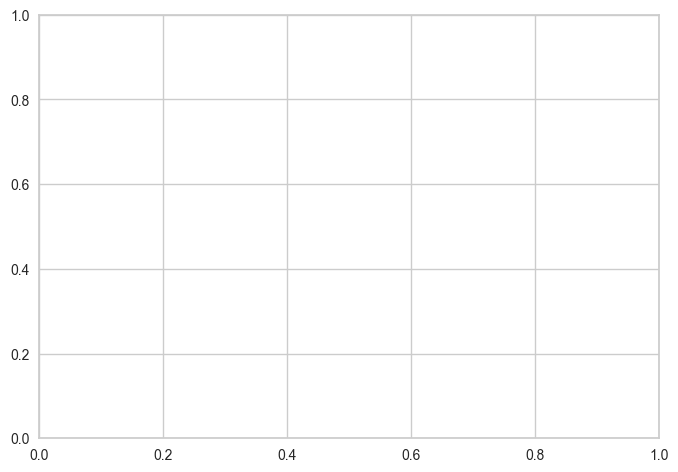

In [24]:
from pycaret.classification import evaluate_model

# 모델 평가
evaluate_model(best_model)


In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 예측 확률 추출
if 'prediction_score' in predictions.columns:
    y_scores = predictions['prediction_score']  # 예측 결과에서 확률 점수 추출
else:
    # 'prediction_score' 열이 없을 경우, 예측 결과를 확인하고 적절한 열 이름으로 대체
    raise KeyError("예측 결과에 'prediction_score' 열이 없습니다. 현재 열: {}".format(predictions.columns.tolist()))

# '이탈 여부' 열이 new_data에 존재하는지 확인
if '이탈 여부' in new_data.columns:
    y_true = new_data['이탈 여부']  # 실제 레이블 (이탈 여부)
else:
    raise KeyError("'이탈 여부' 열이 new_data에 없습니다. 현재 열: {}".format(new_data.columns.tolist()))

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# ROC 곡선 시각화
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC 곡선 (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('거짓 양성 비율 (FPR)')
plt.ylabel('진짜 양성 비율 (TPR)')
plt.title('수신자 조작 특성 곡선 (ROC 곡선)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


KeyError: "'이탈 여부' 열이 new_data에 없습니다. 현재 열: ['고객 ID', '가입 기간', '접속 기기', '도시 등급', '배송거리', '결제 방식', '성별', '앱 사용 시간', '기기 수', '주문 카테고리', '만족도', '결혼 여부', '주소 수', '불만족 여부', '주문 증가율', '쿠폰 수', '주문 횟수', '경과일', '캐시백 금액']"